# Introduction

This goal of this project is to analyze biodiversity data from the National Parks Service, particularly around various species observed in different national park locations.

This project will scope, analyze, prepare, plot data, and seek to explain the findings from the analysis.

# Import Data

In [153]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.ticker as mtick
from matplotlib import pyplot as plt

observation = pd.read_csv('observations.csv')
species = pd.read_csv('species_info.csv')

# Data Inspection

## Observation Dataset

In [154]:
observation.info()
observation.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB


,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85
5,Elymus virginicus var. virginicus,Yosemite National Park,112
6,Spizella pusilla,Yellowstone National Park,228
7,Elymus multisetus,Great Smoky Mountains National Park,39
8,Lysimachia quadrifolia,Yosemite National Park,168
9,Diphyscium cumberlandianum,Yellowstone National Park,250


In [155]:
print(observation.park_name.unique())
print(observation.park_name.nunique())

['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Yellowstone National Park']
4


### Which park had the most observations?

In [156]:
observation.groupby('park_name').sum().sort_values('observations', ascending = False)

,observations
park_name,
Yellowstone National Park,1443562
Yosemite National Park,863332
Bryce National Park,576025
Great Smoky Mountains National Park,431820


### Which species had the most observations?

In [157]:
observation.groupby('scientific_name').sum().sort_values('observations', ascending = False)

,observations
scientific_name,
Streptopelia decaocto,1785
Holcus lanatus,1780
Castor canadensis,1725
Hypochaeris radicata,1720
Puma concolor,1711
...,...
Rana sierrae,144
Noturus baileyi,143
Vermivora bachmanii,141


## Species Dataset

In [158]:
species.info()
species.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB


,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN
5,Mammal,Odocoileus virginianus,White-Tailed Deer,NaN
6,Mammal,Sus scrofa,"Feral Hog, Wild Pig",NaN
7,Mammal,Canis latrans,Coyote,Species of Concern
8,Mammal,Canis lupus,Gray Wolf,Endangered
9,Mammal,Canis rufus,Red Wolf,Endangered


### Let's replace missing values:

In [159]:
species.fillna('None', inplace=True)
species.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,None
1,Mammal,Bos bison,"American Bison, Bison",None
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",None
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",None
4,Mammal,Cervus elaphus,Wapiti Or Elk,None


In [160]:
print(species.category.unique())
print(species.category.nunique())
print(species.conservation_status.unique())
print(species.conservation_status.nunique())

['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']
7
['None' 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']
5


### What species category was observed most often?

In [172]:
species.groupby('category').size().sort_values(ascending = False)

category
Vascular Plant       4470
Bird                  521
Nonvascular Plant     333
Mammal                214
Fish                  127
Amphibian              80
Reptile                79
dtype: int64

### What is the conservation status of most of the species observed?

In [173]:
species.groupby('conservation_status').size().sort_values(ascending = False)

conservation_status
None                  5633
Species of Concern     161
Endangered              16
Threatened              10
In Recovery              4
dtype: int64

### Below we are exploring all the categories contained in the conservation_status column of the Species dataset, only including those who are currently in need of intervention.

In [163]:
conservationStatus = species[species.conservation_status != 'None']\
    .groupby(["conservation_status", "category"])['scientific_name']\
    .count()\
    .unstack()

conservationStatus

category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
conservation_status,,,,,,,
Endangered,1.0,4.0,3.0,7.0,NaN,NaN,1.0
In Recovery,NaN,3.0,NaN,1.0,NaN,NaN,NaN
Species of Concern,4.0,72.0,4.0,28.0,5.0,5.0,43.0
Threatened,2.0,NaN,4.0,2.0,NaN,NaN,2.0


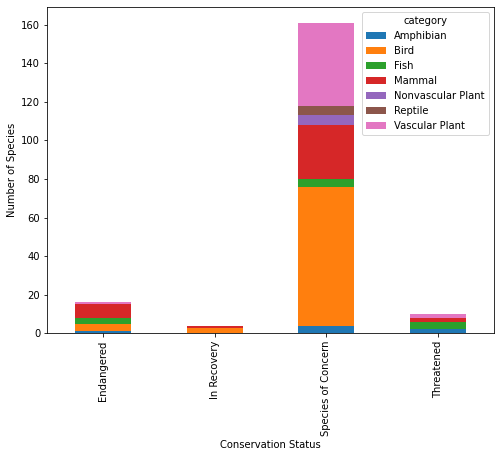

In [164]:
ax = conservationStatus.plot(kind = 'bar', figsize=(8,6), 
                               stacked=True)
ax.set_xlabel("Conservation Status")
ax.set_ylabel("Number of Species");

# Protected Status

## The next question is if certain types of species are more likely to be endangered? This can be answered by creating a new column called `is_protected` and include any species that had a value other than `None`. 

In [165]:
species['is_protected'] = species.conservation_status != 'None'

In [166]:
category_counts = species.groupby(['category', 'is_protected']).scientific_name.nunique().reset_index().pivot(columns='is_protected', index='category', values='scientific_name').reset_index()
category_counts.columns = ['category', 'not_protected', 'protected']

category_counts

,category,not_protected,protected
0,Amphibian,72,7
1,Bird,413,75
2,Fish,115,11
3,Mammal,146,30
4,Nonvascular Plant,328,5
5,Reptile,73,5
6,Vascular Plant,4216,46


### With the chart above we can see that Birds, Vascular Plants, and Mammals have a higher absolute number of species protected. 

# Rate of Protection

In [174]:
category_counts['percent_protected'] = category_counts.protected / (category_counts.protected + category_counts.not_protected) * 100

category_counts

,category,not_protected,protected,percent_protected
0,Amphibian,72,7,8.860759
1,Bird,413,75,15.368852
2,Fish,115,11,8.730159
3,Mammal,146,30,17.045455
4,Nonvascular Plant,328,5,1.501502
5,Reptile,73,5,6.410256
6,Vascular Plant,4216,46,1.079305


In [182]:
percent_pie = category_counts.groupby('category')['percent_protected'].sum()
percent_pie

category
Amphibian             8.860759
Bird                 15.368852
Fish                  8.730159
Mammal               17.045455
Nonvascular Plant     1.501502
Reptile               6.410256
Vascular Plant        1.079305
Name: percent_protected, dtype: float64

Text(0.5, 1.4, 'Species Population Protected')

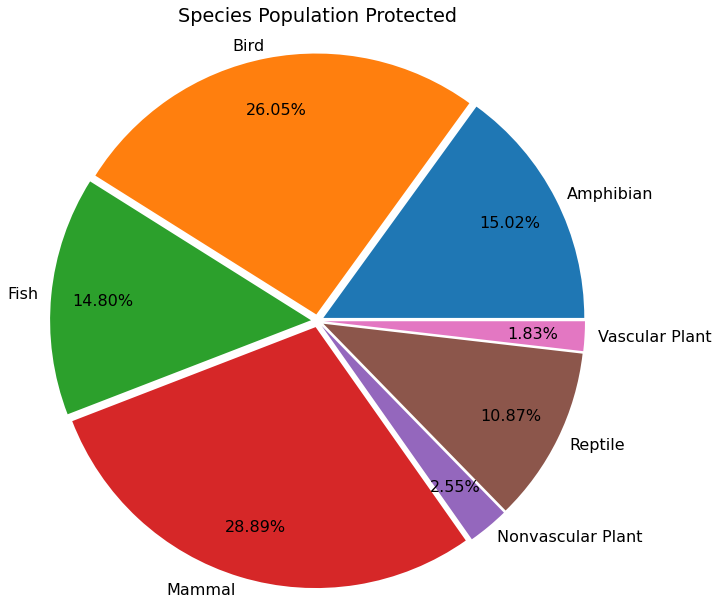

In [240]:

pie, ax = plt.subplots(figsize=[10,6])
labels = percent_pie.keys()
plt.pie(x=percent_pie, autopct='%0.2f%%', explode=[0.05]*7, labels=labels, pctdistance=0.8, labeldistance=1.05, radius=2)
plt.ylabel('')
plt.rcParams['axes.titley']=1.4
plt.rcParams['font.size']=16
plt.title('Species Population Protected')